In [1]:
#Quick fix if pandas/scklearn/seaborn not installed on your environment!
#!pip install pandas matplotlib
#!pip install scikit-learn
#!pip install seaborn

In [2]:
# Setup and Imports
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

from metrics_clean_data import collect_cleaned_lyrics
from metrics import (
    # average_line_length, -- ignoring this metric given our generated lyrics ignore it too
    song_word_variation,
    genre_word_variation,
    i_vs_you_score,
    count_word_repetitions,
    cosine_similarity
)

In [3]:
# Load pre-cleaned songs and genre labels from CSV files

# LSTM TRAINING DATA
songs_train, genres_train = collect_cleaned_lyrics("../../LSTM_data")

# Print sample information
print("Sample Lyrics Snippet:\n", songs_train[0][:300])
print("Genres Found:", set(genres_train))
print("Total Songs loaded:", len(songs_train))

Sample Lyrics Snippet:
 49 ContributorsTranslationsEspañolone of wun Lyrics
(That's a good one, P)

One-of-one bitches, they tens
One of one, never again (One of one)
Wun get the cake and the butter, I count it like hustle, the money all-in
Ride 'round the town in a drop-top coupe and the motor in the trunk, you can hear i
Genres Found: {'hiphop3', 'hiphop1', 'rock2', 'rb1', 'rb2', 'rb3', 'country2', 'hiphop2', 'rock3', 'rock1', 'country', 'rock', 'hiphop5', 'pop3', 'pop', 'pop2', 'hiphop4', 'pop1'}
Total Songs loaded: 4904


In [4]:
# SCRAPED SPOTIFY DATA
songs_spotify, genres_spotify = collect_cleaned_lyrics("../../data")

print("Sample Lyrics Snippet:\n", songs_spotify[0][:300])
print("Genres Found:", set(genres_spotify))
print("Total Songs loaded:", len(songs_spotify))

 !!Error!! reading classical_new.csv: Can only use .str accessor with string values!
**Skipping** bert_data_sorted_full_version.csv: no 'lyrics' column found.
**Skipping** bert_data_top10_version.csv: no 'lyrics' column found.
Sample Lyrics Snippet:
 46 ContributorsTranslationsDanskEspañolPortuguêsDeutschChasing Pavements Lyrics
I've made up my mind
Don't need to think it over
If I'm wrong, I am right
Don't need to look no further
This ain't lust, I know this is love, but
If I tell the world, I'll never say enough
'Cause it was not said to you
A
Genres Found: {'test2_set', 'trance_ambient', 'sad_happy', 'jazz_new', 'latin_new', 'pop_rock_hiphop_rap_new', 'hiphop_jazz_rock', 'rap_new', 'rb_new', 'rb_indie_classical_new', 'disco_party_blues_new', 'romantic_playlist', 'pop_new', 'hiphop_new', 'disco_party_blues', 'disco_party_blues2', 'metal_latin_classic', 'pop_rock_hiphop_rap', 'country_new', 'rock_new', 'rb_indie_classical', 'my_playlist', 'test_set', 'rap_edm_country', 'kpop', 'edm_ne

In [5]:
# GENERATED LYRICS DATA 
# NOTE * generated lyrics data .csv format is different
#        than the scraped and trained data formatting!
# --> This leads to "avg. line length" and "i vs. you score" being invalid metrics
songs_generated, genres_generated = collect_cleaned_lyrics("../../generated_lyrics", generated=True)

print("Sample Lyrics Snippet:\n", songs_generated[0][:300])
print("Genres Found:", set(genres_generated))
print("Total Songs loaded:", len(songs_generated))

 !!Error!! reading rb_generated.csv: ['lyrics']
 !!Error!! reading rock_generated.csv: ['lyrics']
 !!Error!! reading country_generated.csv: ['lyrics']
 !!Error!! reading hiphop_generated.csv: ['lyrics']
 !!Error!! reading pop_generated.csv: ['lyrics']
Sample Lyrics Snippet:
 sings against it our as we see how something is do it you make them into the blood away back theyre so we did or youll we it cold to then she so many anyway in been worth sweet in is and it see ill be mine this song now right now its true dont bother for you you already drag no shame i its alright i
Genres Found: {'rb_generated', 'pop_generated', 'hiphop_generated', 'country_generated', 'rock_generated'}
Total Songs loaded: 380


In [6]:
# Group lyrics by genre
genre_data_train = defaultdict(list)
for lyric, genre in zip(songs_train, genres_train):
    genre_data_train[genre].append(lyric)

# Show how many songs per genre
for genre, lyrics in genre_data_train.items():
    print(f"{genre}: {len(lyrics)} songs")

hiphop5: 104 songs
country: 187 songs
pop3: 190 songs
hiphop3: 84 songs
pop2: 190 songs
pop1: 74 songs
hiphop4: 84 songs
rock2: 628 songs
rock1: 578 songs
rb2: 840 songs
hiphop2: 105 songs
pop: 114 songs
rb3: 229 songs
rock: 625 songs
rock3: 78 songs
hiphop1: 65 songs
country2: 187 songs
rb1: 542 songs


In [7]:
# Group lyrics by genre
genre_data_spotify = defaultdict(list)
for lyric, genre in zip(songs_spotify, genres_spotify):
    genre_data_spotify[genre].append(lyric)

# Show how many songs per genre
for genre, lyrics in genre_data_spotify.items():
    print(f"{genre}: {len(lyrics)} songs")


sad_happy: 74 songs
kpop: 187 songs
metal_latin_classic: 595 songs
jazz_new: 125 songs
hiphop_jazz_rock: 65 songs
rb_indie_classical_new: 840 songs
romantic_playlist: 105 songs
pop_rock_hiphop_rap_new: 190 songs
trance_ambient: 8 songs
pop_rock_hiphop_rap: 190 songs
test_set: 44 songs
test2_set: 328 songs
disco_party_blues: 625 songs
rb_indie_classical: 542 songs
latin_new: 13 songs
disco_party_blues_new: 628 songs
rock_new: 578 songs
rb_new: 229 songs
rap_edm_country: 84 songs
disco_party_blues2: 78 songs
my_playlist: 18 songs
rap_new: 104 songs
hiphop_new: 105 songs
edm_new: 57 songs
pop_new: 114 songs
country_new: 187 songs


In [8]:
genre_data_generated = defaultdict(list)
for lyric, genre in zip(songs_generated, genres_generated):
    genre_data_generated[genre].append(lyric)

# Show how many songs per genre
for genre, lyrics in genre_data_generated.items():
    print(f"{genre}: {len(lyrics)} songs")

rb_generated: 73 songs
rock_generated: 91 songs
country_generated: 79 songs
hiphop_generated: 53 songs
pop_generated: 84 songs


In [9]:
# Compute metrics for each individual song -- TRAIN
results = []
for genre, lyric_list in genre_data_train.items():
    for lyrics in lyric_list:
        results.append({
            "genre": genre,
            #"avg_line_length": average_line_length(lyrics),
            "word_variation": song_word_variation(lyrics),
            "i_vs_you": i_vs_you_score(lyrics),
            "repetitions": count_word_repetitions(lyrics)
        })

df_train = pd.DataFrame(results)
df_train.head()

,genre,word_variation,i_vs_you,repetitions
0,hiphop5,0.433555,9,16
1,hiphop5,0.363768,-9,7
2,hiphop5,0.539548,0,10
3,hiphop5,0.267905,10,11
4,hiphop5,0.364103,2,24


In [10]:
# Compute metrics for each individual song -- SPOTIFY
results = []
for genre, lyric_list in genre_data_spotify.items():
    for lyrics in lyric_list:
        results.append({
            "genre": genre,
            #"avg_line_length": average_line_length(lyrics),
            "word_variation": song_word_variation(lyrics),
            "i_vs_you": i_vs_you_score(lyrics),
            "repetitions": count_word_repetitions(lyrics)
        })

df_spotify = pd.DataFrame(results)
df_spotify.head()

,genre,word_variation,i_vs_you,repetitions
0,sad_happy,0.300341,2,1
1,sad_happy,0.494845,6,0
2,sad_happy,0.340000,-16,7
3,sad_happy,0.380282,5,0
4,sad_happy,0.403409,5,2


In [11]:
# Compute metrics for each individual song -- GENERATED
results = []
for genre, lyric_list in genre_data_generated.items():
    for lyrics in lyric_list:
        results.append({
            "genre": genre,
            #"avg_line_length": average_line_length(lyrics),
            "word_variation": song_word_variation(lyrics),
            "i_vs_you": i_vs_you_score(lyrics),
            "repetitions": count_word_repetitions(lyrics)
        })

df_generated = pd.DataFrame(results)
df_generated.head()

,genre,word_variation,i_vs_you,repetitions
0,rb_generated,0.747475,0,2
1,rb_generated,0.666667,0,1
2,rb_generated,0.700000,0,0
3,rb_generated,0.630000,0,0
4,rb_generated,0.757576,0,0


In [12]:
# Display the first 5 rows of metrics for the first 5 genres -- SPOTIFY
first_genres = list(df_spotify["genre"].unique())[5:10]  # grab first 5 unique genres

for genre in first_genres:
    print(f"Top 5 Songs in Genre: {genre.upper()}")
    display(df_spotify[df_spotify["genre"] == genre].head(5))  # use display for clean output in Jupyter
    print("\n" + "-"*60 + "\n")

Top 5 Songs in Genre: RB_INDIE_CLASSICAL_NEW


,genre,word_variation,i_vs_you,repetitions
1046,rb_indie_classical_new,0.381766,3,0
1047,rb_indie_classical_new,0.541899,-1,0
1048,rb_indie_classical_new,0.439189,5,0
1049,rb_indie_classical_new,0.560440,3,0
1050,rb_indie_classical_new,0.303249,0,0



------------------------------------------------------------

Top 5 Songs in Genre: ROMANTIC_PLAYLIST


,genre,word_variation,i_vs_you,repetitions
1886,romantic_playlist,0.323529,-3,14
1887,romantic_playlist,0.377358,0,5
1888,romantic_playlist,0.418919,0,7
1889,romantic_playlist,0.318182,0,0
1890,romantic_playlist,0.435331,-1,1



------------------------------------------------------------

Top 5 Songs in Genre: POP_ROCK_HIPHOP_RAP_NEW


,genre,word_variation,i_vs_you,repetitions
1991,pop_rock_hiphop_rap_new,0.379032,1,0
1992,pop_rock_hiphop_rap_new,0.297143,9,24
1993,pop_rock_hiphop_rap_new,0.237288,7,0
1994,pop_rock_hiphop_rap_new,0.424883,8,17
1995,pop_rock_hiphop_rap_new,0.317901,5,13



------------------------------------------------------------

Top 5 Songs in Genre: TRANCE_AMBIENT


,genre,word_variation,i_vs_you,repetitions
2181,trance_ambient,0.411765,4,0
2182,trance_ambient,0.439024,0,0
2183,trance_ambient,0.434783,7,0
2184,trance_ambient,0.371951,3,5
2185,trance_ambient,0.642857,0,0



------------------------------------------------------------

Top 5 Songs in Genre: POP_ROCK_HIPHOP_RAP


,genre,word_variation,i_vs_you,repetitions
2189,pop_rock_hiphop_rap,0.379032,1,0
2190,pop_rock_hiphop_rap,0.297143,9,24
2191,pop_rock_hiphop_rap,0.237288,7,0
2192,pop_rock_hiphop_rap,0.424883,8,17
2193,pop_rock_hiphop_rap,0.317901,5,13



------------------------------------------------------------



In [13]:
# Display the first 5 rows of metrics for the first 5 genres -- TRAIN
first_genres = list(df_train["genre"].unique())[5:10]  # grab first 5 unique genres

for genre in first_genres:
    print(f"Top 5 Songs in Genre: {genre.upper()}")
    display(df_train[df_train["genre"] == genre].head(5))  # use display for clean output in Jupyter
    print("\n" + "-"*60 + "\n")


Top 5 Songs in Genre: POP1


,genre,word_variation,i_vs_you,repetitions
755,pop1,0.300341,2,1
756,pop1,0.494845,6,0
757,pop1,0.340000,-16,7
758,pop1,0.380282,5,0
759,pop1,0.403409,5,2



------------------------------------------------------------

Top 5 Songs in Genre: HIPHOP4


,genre,word_variation,i_vs_you,repetitions
829,hiphop4,0.423237,7,7
830,hiphop4,0.386076,2,2
831,hiphop4,0.365931,6,4
832,hiphop4,0.363067,0,3
833,hiphop4,0.384248,3,0



------------------------------------------------------------

Top 5 Songs in Genre: ROCK2


,genre,word_variation,i_vs_you,repetitions
913,rock2,0.330961,1,21
914,rock2,0.598326,2,1
915,rock2,0.294118,1,0
916,rock2,0.320285,2,26
917,rock2,0.262987,0,4



------------------------------------------------------------

Top 5 Songs in Genre: ROCK1


,genre,word_variation,i_vs_you,repetitions
1541,rock1,0.412935,8,1
1542,rock1,0.361204,-1,0
1543,rock1,0.473958,0,0
1544,rock1,0.501340,5,12
1545,rock1,0.374150,6,3



------------------------------------------------------------

Top 5 Songs in Genre: RB2


,genre,word_variation,i_vs_you,repetitions
2119,rb2,0.381766,3,0
2120,rb2,0.541899,-1,0
2121,rb2,0.439189,5,0
2122,rb2,0.560440,3,0
2123,rb2,0.303249,0,0



------------------------------------------------------------



In [14]:
# Display the first 5 rows of metrics for the first 5 genres -- GENERATED
first_genres = list(df_generated["genre"].unique())[0:5]  # grab first 5 unique genres

for genre in first_genres:
    print(f"Top 5 Songs in Genre: {genre.upper()}")
    display(df_generated[df_generated["genre"] == genre].head(5))  # use display for clean output in Jupyter
    print("\n" + "-"*60 + "\n")


Top 5 Songs in Genre: RB_GENERATED


,genre,word_variation,i_vs_you,repetitions
0,rb_generated,0.747475,0,2
1,rb_generated,0.666667,0,1
2,rb_generated,0.700000,0,0
3,rb_generated,0.630000,0,0
4,rb_generated,0.757576,0,0



------------------------------------------------------------

Top 5 Songs in Genre: ROCK_GENERATED


,genre,word_variation,i_vs_you,repetitions
73,rock_generated,0.760000,0,0
74,rock_generated,0.640000,0,1
75,rock_generated,0.737374,0,0
76,rock_generated,0.550000,0,2
77,rock_generated,0.630000,0,0



------------------------------------------------------------

Top 5 Songs in Genre: COUNTRY_GENERATED


,genre,word_variation,i_vs_you,repetitions
164,country_generated,0.72,0,1
165,country_generated,0.72,0,1
166,country_generated,0.74,0,1
167,country_generated,0.72,0,0
168,country_generated,0.73,0,1



------------------------------------------------------------

Top 5 Songs in Genre: HIPHOP_GENERATED


,genre,word_variation,i_vs_you,repetitions
243,hiphop_generated,0.75,0,0
244,hiphop_generated,0.74,0,0
245,hiphop_generated,0.81,0,0
246,hiphop_generated,0.72,0,3
247,hiphop_generated,0.76,0,2



------------------------------------------------------------

Top 5 Songs in Genre: POP_GENERATED


,genre,word_variation,i_vs_you,repetitions
296,pop_generated,0.670000,0,1
297,pop_generated,0.620000,0,1
298,pop_generated,0.720000,0,2
299,pop_generated,0.720000,0,1
300,pop_generated,0.727273,0,0



------------------------------------------------------------



In [15]:
# # Optional!!: Save the metrics table to a csv file!
# df.to_csv("results/genre_metrics.csv", index=False)

# # Display average values by genre
# df.groupby("genre").mean().round(2)

In [16]:
# Generic plotting function -- TRAIN
def plot_metric_by_genre(df_train, metric_name, ylabel):
    grouped = df_train.groupby("genre")[metric_name].mean().sort_values()
    plt.figure(figsize=(14, 7))
    grouped.plot(kind="bar", color="cornflowerblue", edgecolor="black")
    plt.title(f"Average {metric_name.replace('_', ' ').title()} by Genre")
    plt.ylabel(ylabel)
    plt.xlabel("Genre")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()


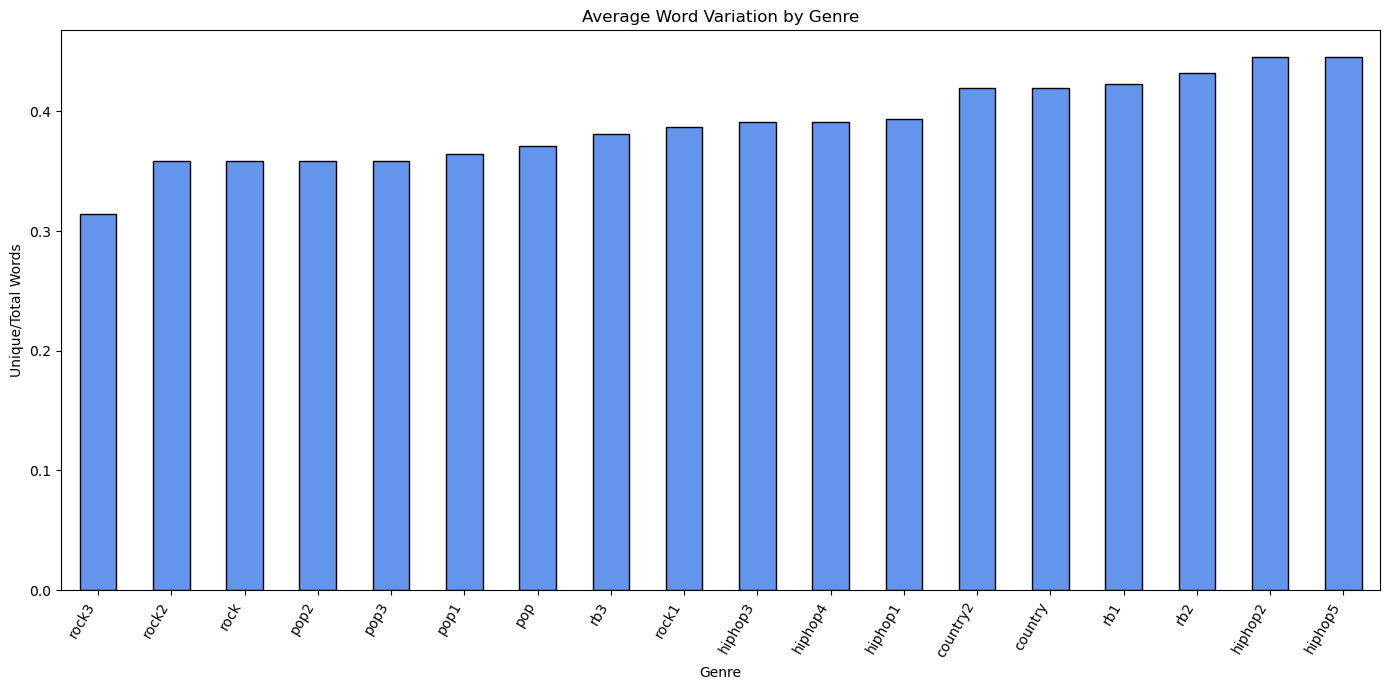

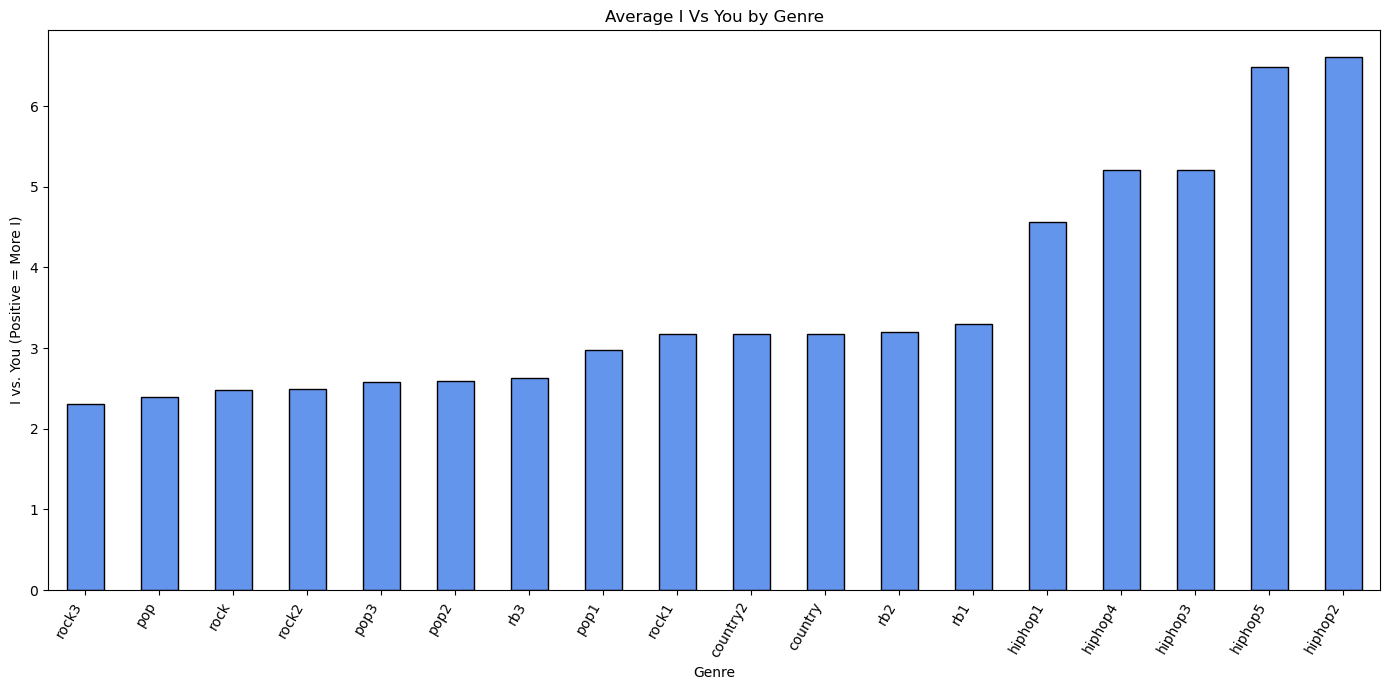

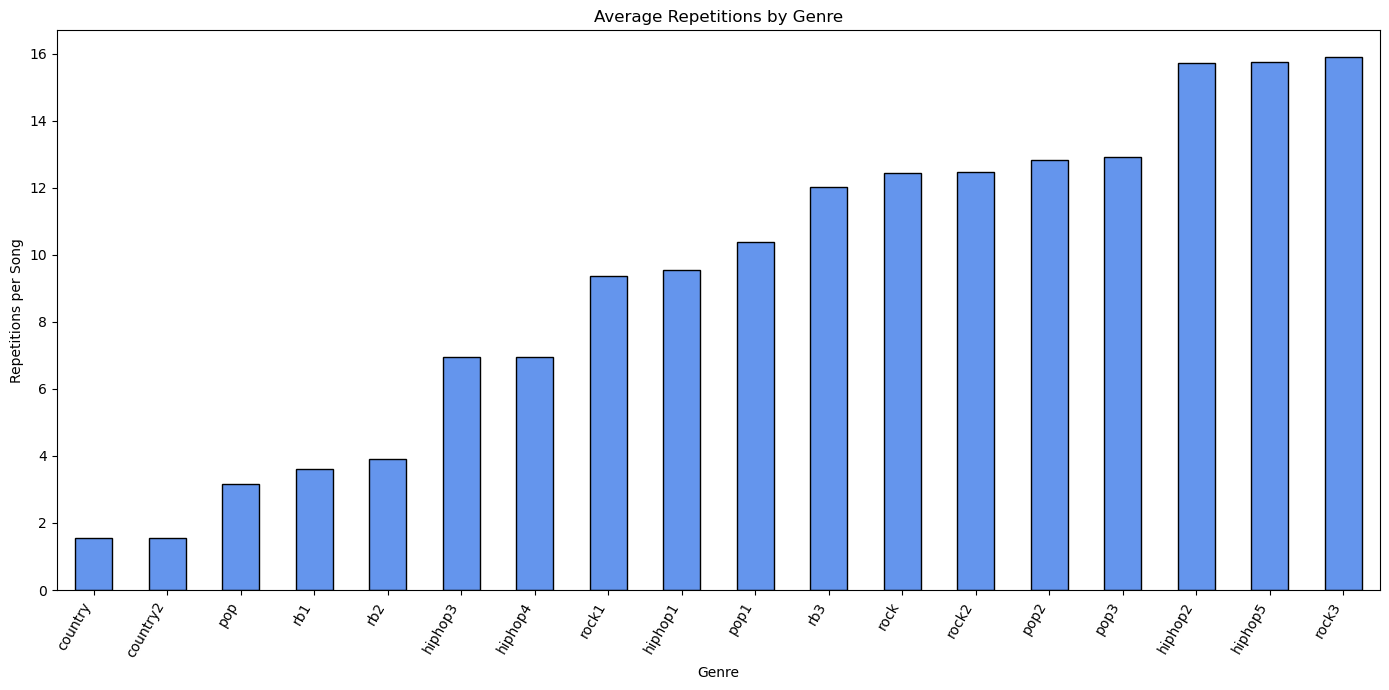

In [17]:
# Visualize each metric -- TRAIN
#plot_metric_by_genre(df, "avg_line_length", "Avg Words per Line")
plot_metric_by_genre(df_train, "word_variation", "Unique/Total Words")
plot_metric_by_genre(df_train, "i_vs_you", "I vs. You (Positive = More I)")
plot_metric_by_genre(df_train, "repetitions", "Repetitions per Song")

In [18]:
# Generic plotting function -- SPOTIFY
def plot_metric_by_genre(df_spotify, metric_name, ylabel):
    grouped = df_spotify.groupby("genre")[metric_name].mean().sort_values()
    plt.figure(figsize=(14, 7))
    grouped.plot(kind="bar", color="green", edgecolor="black")
    plt.title(f"Average {metric_name.replace('_', ' ').title()} by Genre")
    plt.ylabel(ylabel)
    plt.xlabel("Genre")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()


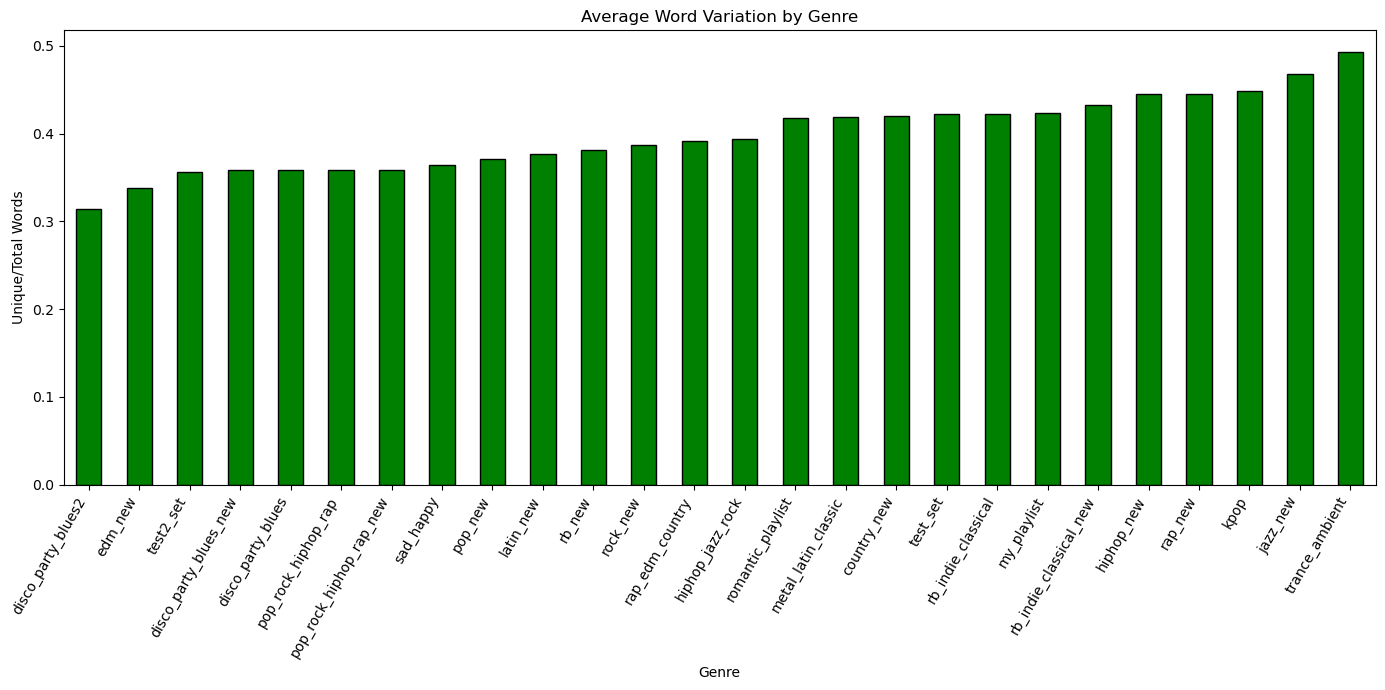

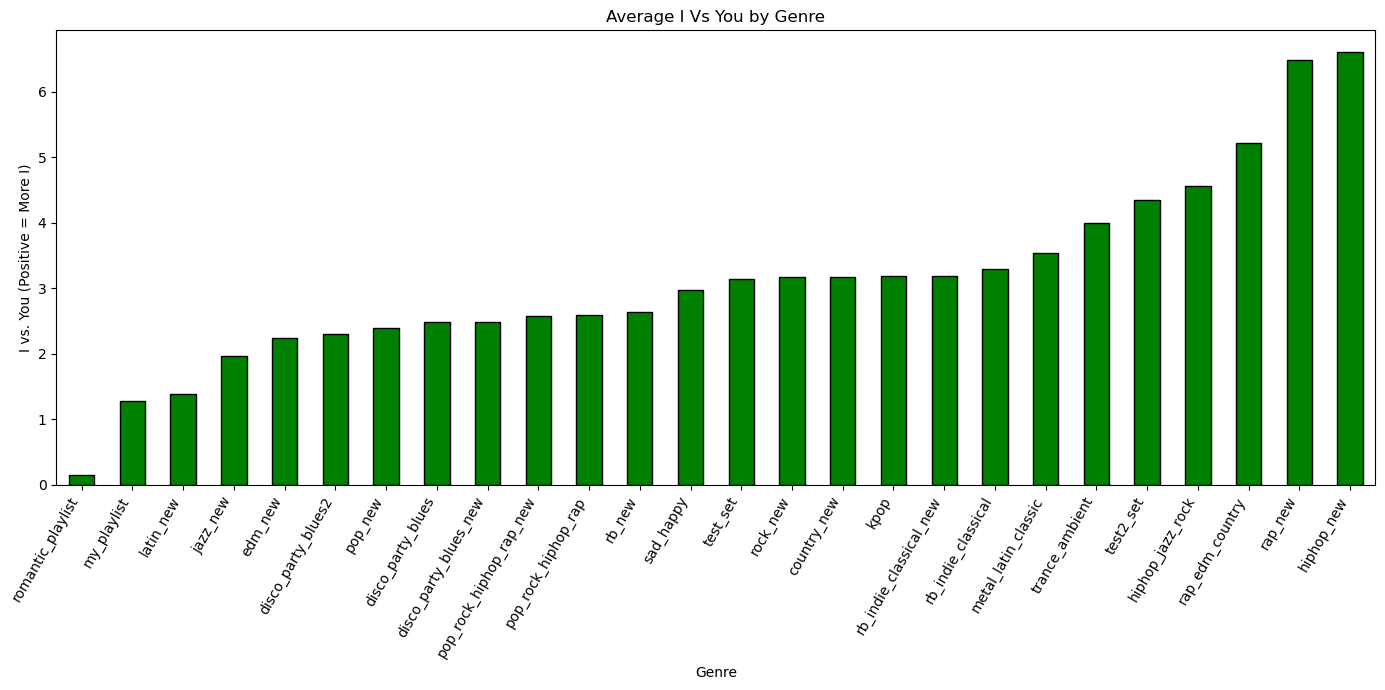

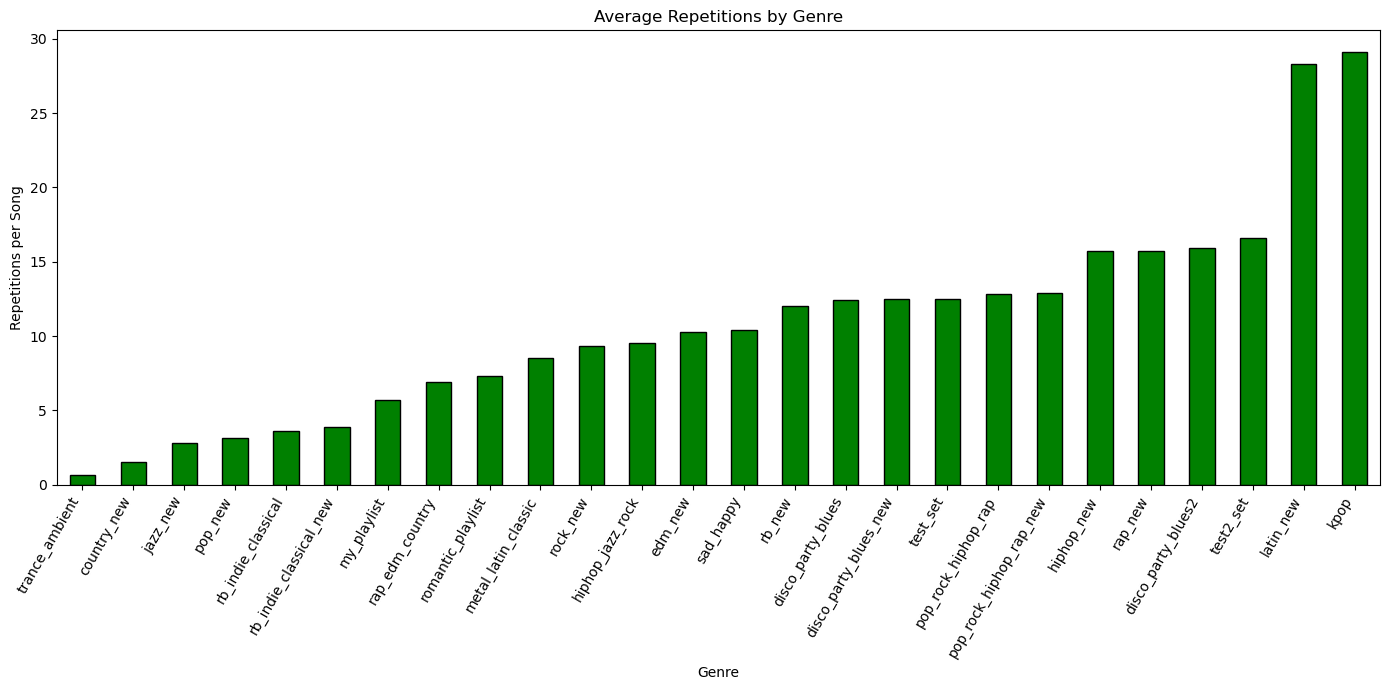

In [19]:
# Visualize each metric
#plot_metric_by_genre(df, "avg_line_length", "Avg Words per Line")
plot_metric_by_genre(df_spotify, "word_variation", "Unique/Total Words")
plot_metric_by_genre(df_spotify, "i_vs_you", "I vs. You (Positive = More I)")
plot_metric_by_genre(df_spotify, "repetitions", "Repetitions per Song")

In [20]:
# Generic plotting function -- GENERATED
def plot_metric_by_genre(df_generated, metric_name, ylabel):
    grouped = df_generated.groupby("genre")[metric_name].mean().sort_values()
    plt.figure(figsize=(14, 7))
    grouped.plot(kind="bar", color="red", edgecolor="black")
    plt.title(f"Average {metric_name.replace('_', ' ').title()} by Genre")
    plt.ylabel(ylabel)
    plt.xlabel("Genre")
    plt.xticks(rotation=60, ha="right")
    plt.tight_layout()
    plt.show()


rb_generated: I = 379, You = 389, I - You = -10
rock_generated: I = 370, You = 498, I - You = -128
country_generated: I = 384, You = 377, I - You = 7
hiphop_generated: I = 247, You = 212, I - You = 35
pop_generated: I = 319, You = 411, I - You = -92


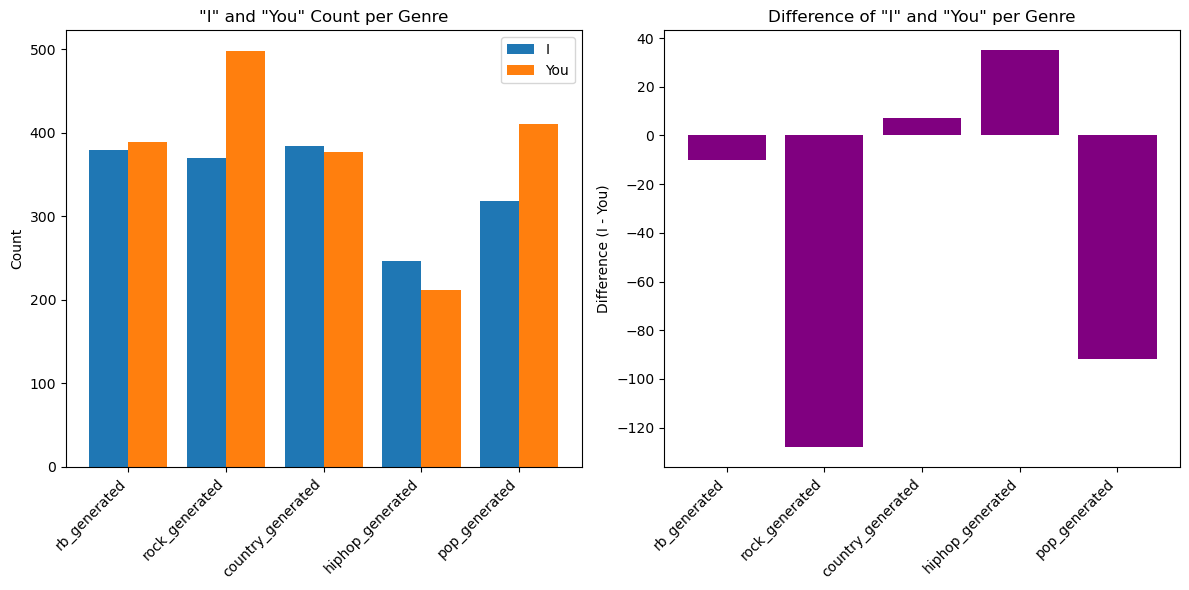

In [24]:
#used chatgpt to generate this code since we realized that the I vs you wouldn't work for the generated lyrics as they have no endline chars
import re
import matplotlib.pyplot as plt

# Dictionaries to hold counts
i_counts = {}
you_counts = {}
differences = {}

# Use the already grouped data: genre_data_generated
for genre, lyrics in genre_data_generated.items():
    i_count = 0
    you_count = 0

    for lyric in lyrics:
        i_count += len(re.findall(r'\bI\b', lyric, re.IGNORECASE))
        you_count += len(re.findall(r'\byou\b', lyric, re.IGNORECASE))

    i_counts[genre] = i_count
    you_counts[genre] = you_count
    differences[genre] = i_count - you_count

    print(f"{genre}: I = {i_count}, You = {you_count}, I - You = {i_count - you_count}")

# Prepare data for plotting
genres = list(i_counts.keys())
i_vals = [i_counts[genre] for genre in genres]
you_vals = [you_counts[genre] for genre in genres]
diff_vals = [differences[genre] for genre in genres]

x = range(len(genres))

# Plot
plt.figure(figsize=(12, 6))

# Plot I and You counts
plt.subplot(1, 2, 1)
plt.bar(x, i_vals, width=0.4, label='I', align='center')
plt.bar([i + 0.4 for i in x], you_vals, width=0.4, label='You', align='center')
plt.xticks([i + 0.2 for i in x], genres, rotation=45, ha='right')
plt.ylabel('Count')
plt.title('"I" and "You" Count per Genre')
plt.legend()

# Plot differences
plt.subplot(1, 2, 2)
plt.bar(genres, diff_vals, color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Difference (I - You)')
plt.title('Difference of "I" and "You" per Genre')

plt.tight_layout()
plt.show()


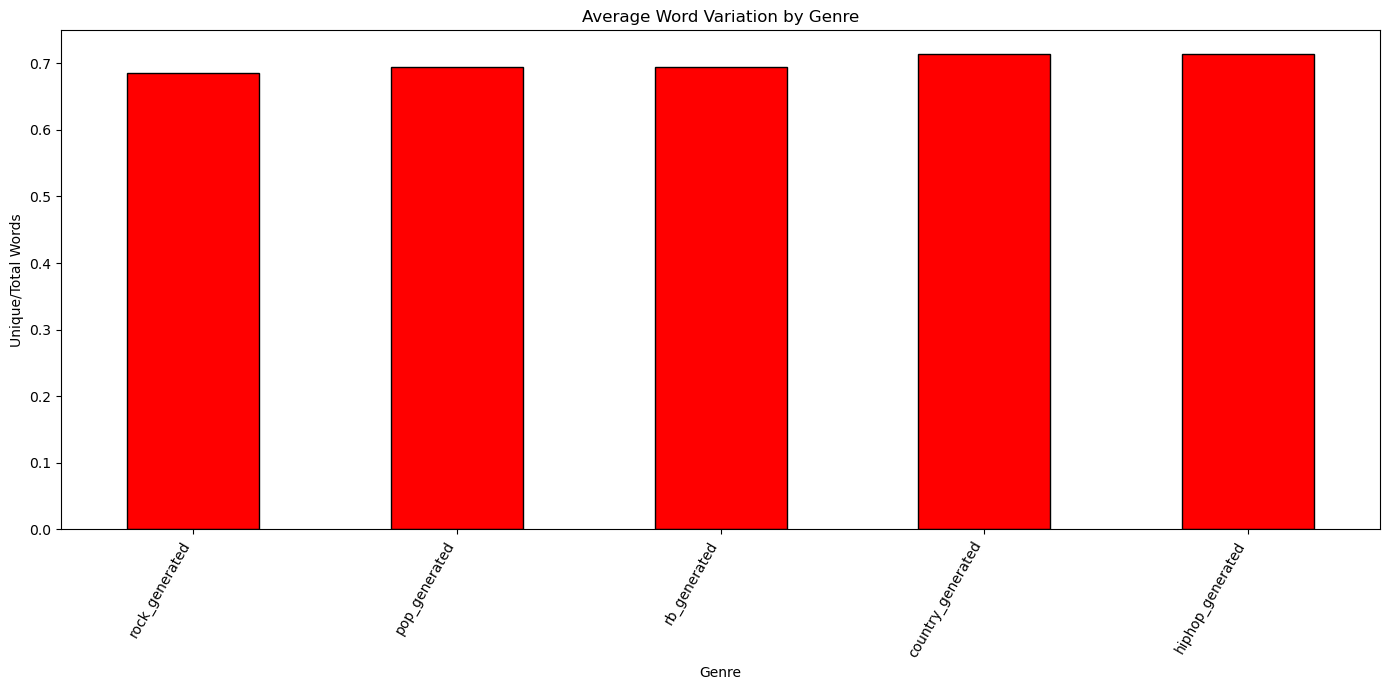

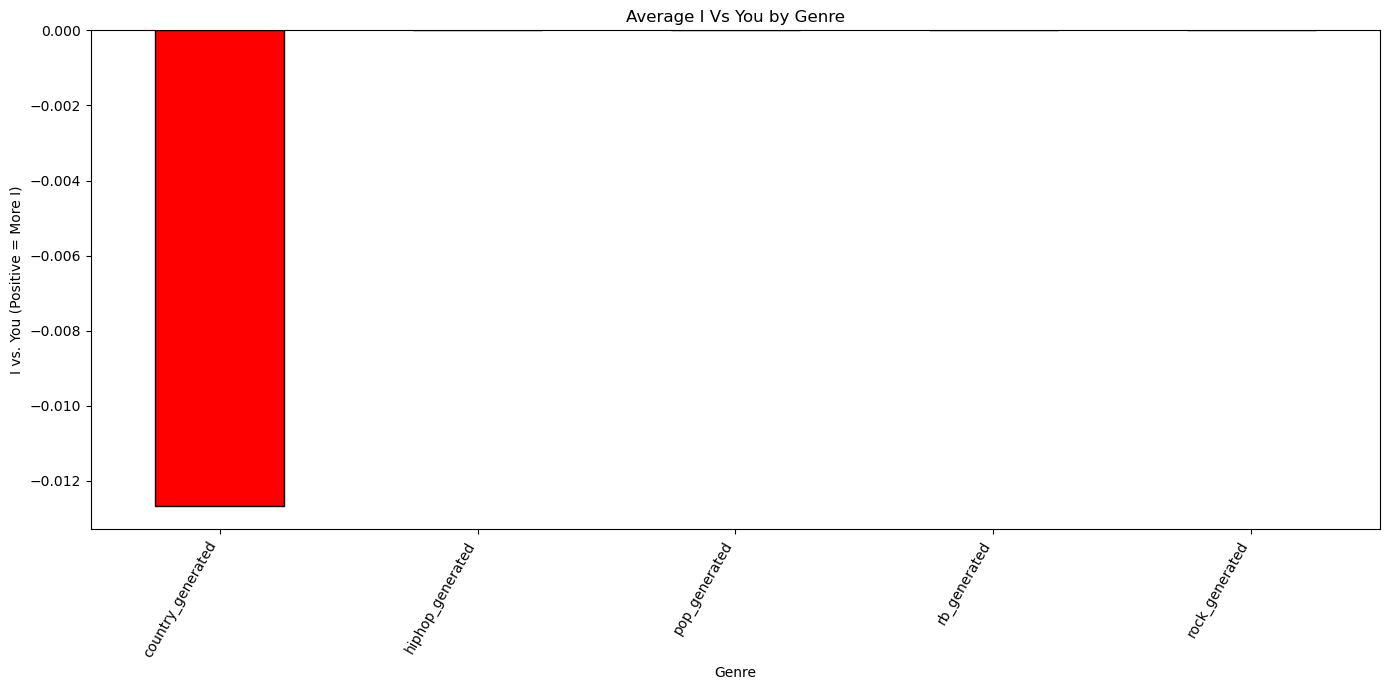

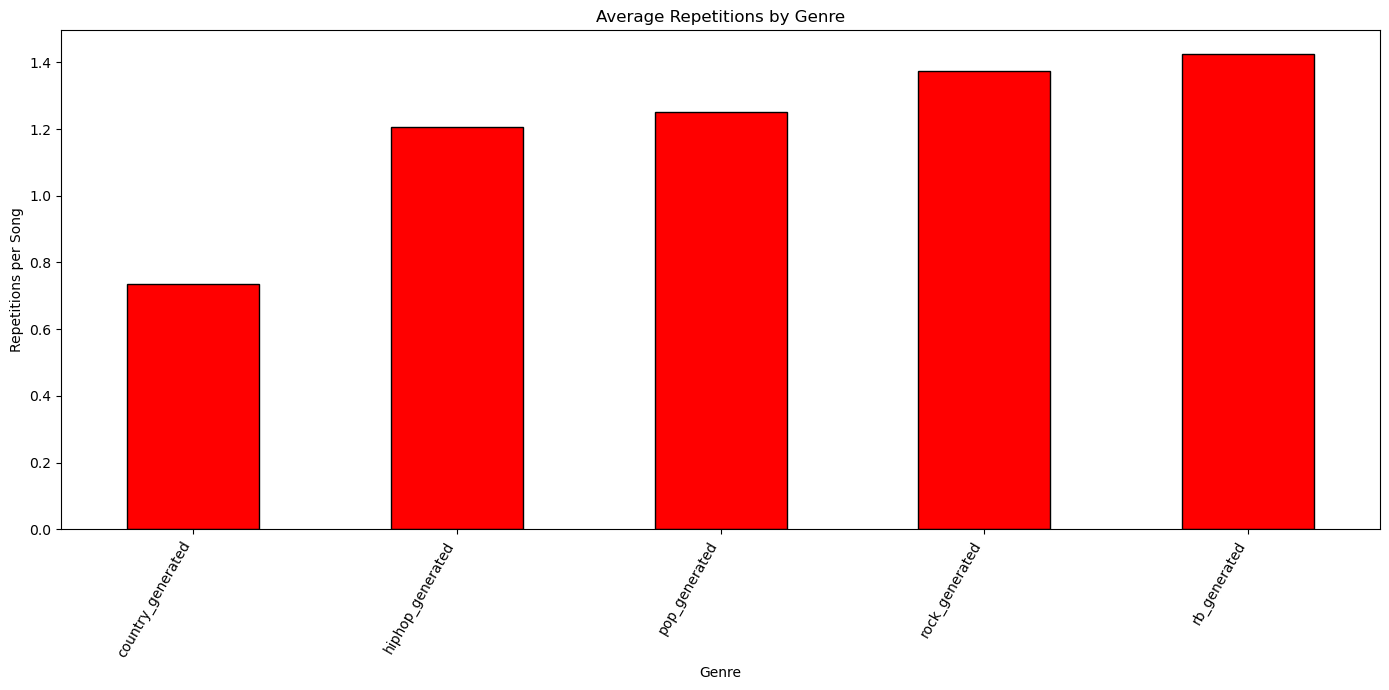

In [21]:
# Visualize each metric
# NOTE * due to generated lyrics csv formatting, cutting some invalidated metrics
#plot_metric_by_genre(df, "avg_line_length", "Avg Words per Line")
plot_metric_by_genre(df_generated, "word_variation", "Unique/Total Words")
# plot_metric_by_genre(df_generated, "i_vs_you", "I vs. You (Positive = More I)")
plot_metric_by_genre(df_generated, "repetitions", "Repetitions per Song")

country_generated average similarity: 0.3691
hiphop_generated average similarity: 0.3451
pop_generated average similarity: 0.3260
rb_generated average similarity: 0.3189
rock_generated average similarity: 0.2598


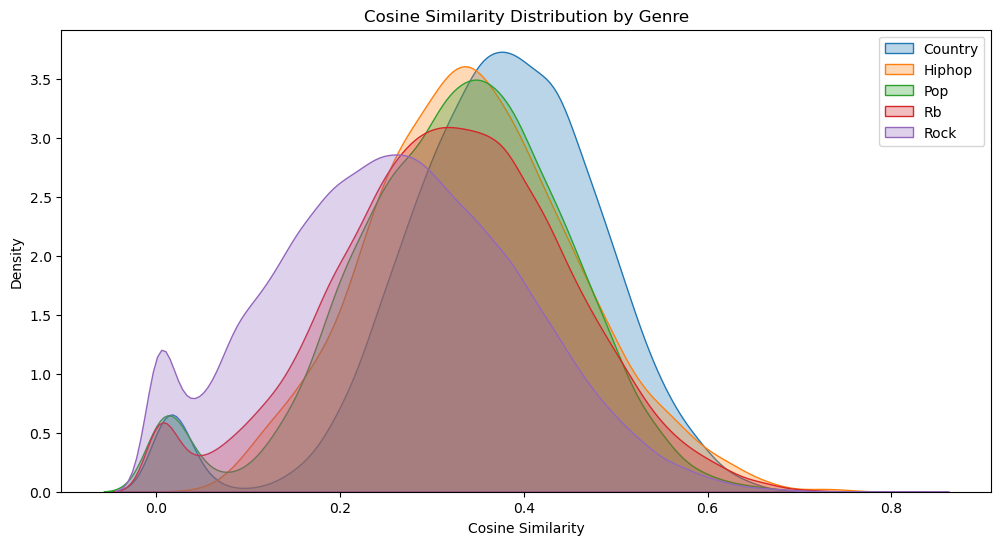

In [22]:
# COSINE SIMILARITY TESTS BETWEEN TRAIN DATA AND GENERATED
from metrics import compute_cosine_similarity
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Mapping from generated genre to multiple matching train genres
genre_mapping = {
    'country_generated': ['country'],
    'hiphop_generated': ['hiphop1'],
    'pop_generated': ['pop'],
    'rb_generated': ['rb1'],
    'rock_generated': ['rock']
}

similarity_results = {}
similarity_scores_by_genre = {}

for gen_genre, real_genres in genre_mapping.items():
    gen_lyrics_list = genre_data_generated[gen_genre]
    all_real_lyrics = []
    for real_genre in real_genres:
        all_real_lyrics.extend(genre_data_train[real_genre])

    all_similarities = []
    for gen_lyric in gen_lyrics_list:
        for real_lyric in all_real_lyrics:
            score = compute_cosine_similarity(gen_lyric, real_lyric)
            all_similarities.append(score)
    
    avg_similarity = sum(all_similarities) / len(all_similarities) if all_similarities else 0
    similarity_results[gen_genre] = avg_similarity
    similarity_scores_by_genre[gen_genre] = all_similarities

    print(f"{gen_genre} average similarity: {avg_similarity:.4f}")

# 📊 Combined Distribution Plot
plt.figure(figsize=(12, 6))
for genre, scores in similarity_scores_by_genre.items():
    sns.kdeplot(scores, label=genre.replace('_generated', '').capitalize(), fill=True, alpha=0.3)
plt.title('Cosine Similarity Distribution by Genre')
plt.xlabel('Cosine Similarity')
plt.ylabel('Density')
plt.legend()
plt.show()


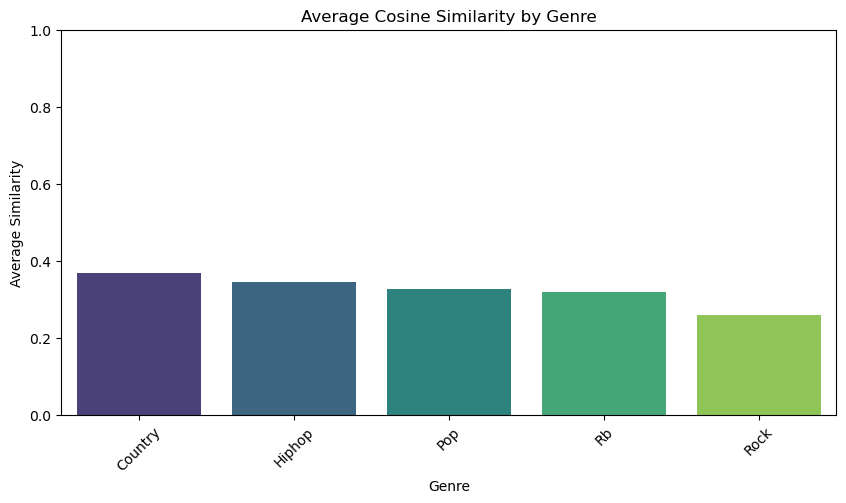

In [23]:
# Bar plot of average similarities
plt.figure(figsize=(10, 5))
genres = list(similarity_results.keys())
avg_scores = [similarity_results[g] for g in genres]

sns.barplot(x=[g.replace('_generated', '').capitalize() for g in genres], y=avg_scores, palette='viridis')
plt.title('Average Cosine Similarity by Genre')
plt.ylabel('Average Similarity')
plt.xlabel('Genre')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()
